# What is an imbalanced dataset?
An imbalanced dataset means that some classes have more data than others.

For example:

Class 0 (Majority): 900 samples  

Class 1 (Minority): 100 samples

# 🔸 What is SMOTE?
SMOTE is a technique used to balance the dataset by creating synthetic (fake but realistic) samples of the minority class.

It works like this:

It picks a data point from the minority class.

Finds its nearest neighbors (same class).

Creates a new sample by mixing the picked point with one of its neighbors.

It helps to increase the minority class without just copying the same data.

# 🔸 What does "fake but realistic" mean in SMOTE?
It means:

# Fake:
 The new data points did not exist in the original dataset. They are generated (synthetic) by SMOTE using a formula.

# Realistic: 
They are not random — they are created by interpolating (mixing) between real data points of the minority class, so they look similar to the real data.

# 🔸 Simple example:
Imagine you have two real points in 2D:

A = (2, 3)

B = (4, 5)

SMOTE might create a new point between A and B, like:

New = (3, 4) ← This is not a copy but a synthetic sample.

✅ It looks like real data

❌ But it’s not exactly from your dataset

That’s why we say:

Fake (generated) but Realistic (similar to real samples)

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

In [3]:
import pandas as pd
x = pd.DataFrame(X,columns=['feature_1','feature_2'])
Y = pd.DataFrame(y,columns=['Target'])
df=pd.concat([x,Y],axis=1)
df.head()

,feature_1,feature_2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
df['Target'].value_counts()

Target
0    900
1    100
Name: count, dtype: int64

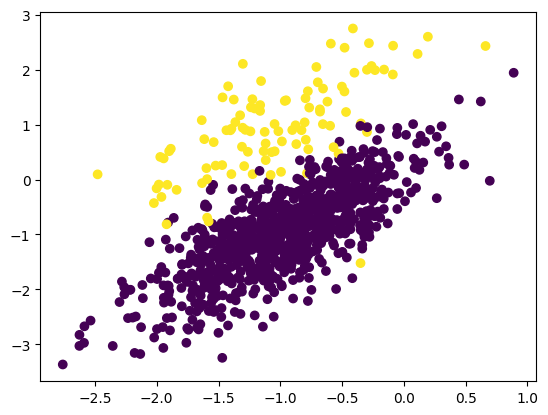

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['Target'])

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
oversample = SMOTE()
x1,y1 = oversample.fit_resample(df[['feature_1','feature_2']],df['Target'])

In [8]:
x1.shape

(1800, 2)

In [9]:
y1.shape

(1800,)

In [10]:
df1 = pd.concat([x1,y1],axis=1)
df1.head()

,feature_1,feature_2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


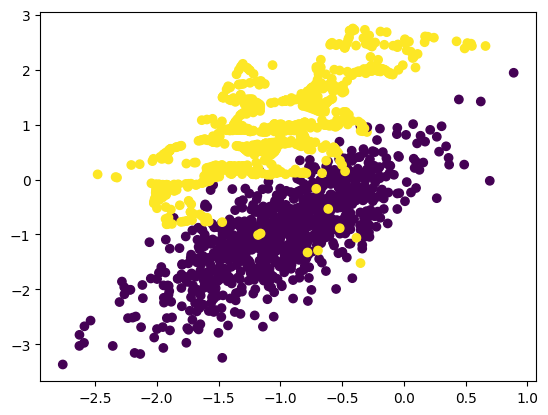

In [11]:
plt.scatter(df1['feature_1'],df1['feature_2'],c=df1['Target'])

In [12]:
df1['Target'].value_counts()

Target
0    900
1    900
Name: count, dtype: int64